In [1]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [2]:
# 시각화 라이브러리 설정
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

In [3]:
df = pd.read_csv("DATASET_1.csv")

In [4]:
df
#21개의 부동산 관련 변수 사용
#2011년 7월~ 2021년 3월 월별 데이터(세종과 제주 제외 주요 시도)

,지역별,시점,건축착공면적[㎡],건축허가면적증감률[%],고용률(시도)[%],실업률(시도),소비자물가지수[2015=100],아파트매매가격지수,아파트전세가격지수[2017.11 = 100.0],주민등록인구[명],...,녹지,유원지,공공공지,교통문화지수,종합의료시설,"인구십만명당 문화기반시설수(A÷B×100,000) (개)",중대형 상가,소규모 상가,집합 상가,Class.1
0,서울특별시,2015,9.990358e+05,34.233333,59.975000,4.191667,99.999167,90.327285,90.627635,1.007213e+07,...,1028,3,820,83.12,21,3.6,159,276,4933,1
1,서울특별시,2016,7.569943e+05,-6.433333,59.966667,4.200000,101.179167,94.417340,96.636442,9.981397e+06,...,1039,3,838,86.19,21,3.7,159,276,4933,1
2,서울특별시,2017,9.388596e+05,76.783333,60.216667,4.525000,103.200000,98.287321,99.020183,9.904795e+06,...,1040,3,854,84.80,21,3.9,218,517,4740,1
3,서울특별시,2018,8.309937e+05,-31.483333,59.625000,4.758333,104.581667,106.075241,100.132139,9.810326e+06,...,1023,3,848,75.09,21,4.1,265,555,4740,1
4,서울특별시,2019,8.475622e+05,22.400000,60.008333,4.383333,105.198333,107.857566,98.473586,9.752326e+06,...,1017,3,847,76.50,21,4.2,378,626,4740,1
5,서울특별시,2020,1.023473e+06,18.300000,59.316667,4.558333,105.852500,111.775293,101.871732,9.711380e+06,...,992,2,844,78.28,20,4.4,497,719,4740,1
6,경기도,2015,4.370644e+06,72.750000,61.675000,3.933333,100.000833,94.717789,92.272267,1.244098e+07,...,6050,21,1672,81.27,48,3.9,159,142,3677,2
7,경기도,2016,4.290225e+06,-1.408333,61.650000,3.908333,100.940833,97.632423,97.651872,1.262367e+07,...,6093,19,1770,84.40,48,4.0,159,142,3677,2
8,경기도,2017,3.626390e+06,-10.616667,62.133333,3.866667,102.968333,99.096961,99.484540,1.279610e+07,...,6380,19,1879,83.81,50,4.1,218,180,4243,2
9,경기도,2018,3.320257e+06,0.641667,61.966667,3.808333,104.498333,100.799990,97.317569,1.298467e+07,...,6836,19,2027,76.43,47,4.1,265,221,4243,2


In [5]:
del df["지역별"]
del df["시점"]

In [6]:
df=(df - df.min()) / (df.max() - df.min())
#min / max 정규화를 통한 21개의 변수 정규화(0~1사이의 값 부여)

In [7]:
df #정규화한 데이터

,건축착공면적[㎡],건축허가면적증감률[%],고용률(시도)[%],실업률(시도),소비자물가지수[2015=100],아파트매매가격지수,아파트전세가격지수[2017.11 = 100.0],주민등록인구[명],주택매매가격지수,주택전세가격지수[2017.11 = 100.0],...,녹지,유원지,공공공지,교통문화지수,종합의료시설,"인구십만명당 문화기반시설수(A÷B×100,000) (개)",중대형 상가,소규모 상가,집합 상가,Class.1
0,0.164302,0.606989,0.352288,0.814714,0.000000,0.135276,0.140232,0.722799,0.029706,0.117380,...,0.056550,0.027027,0.368028,0.760530,0.340909,0.000000,0.208431,0.307812,1.000000,0.5
1,0.104309,0.231373,0.350902,0.817439,0.197710,0.300175,0.534345,0.715112,0.198167,0.523410,...,0.058278,0.027027,0.376992,1.000000,0.340909,0.008621,0.208431,0.307812,1.000000,0.5
2,0.149387,1.000000,0.392510,0.923706,0.536303,0.456202,0.690693,0.708623,0.359978,0.701651,...,0.058435,0.027027,0.384960,0.891576,0.340909,0.025862,0.346604,0.684375,0.960124,0.5
3,0.122651,0.000000,0.294036,1.000000,0.767802,0.770190,0.763625,0.700620,0.696135,0.811882,...,0.055765,0.027027,0.381972,0.134165,0.340909,0.043103,0.456674,0.743750,0.960124,0.5
4,0.126757,0.497691,0.357836,0.877384,0.871125,0.842048,0.654842,0.695706,0.817100,0.718932,...,0.054822,0.027027,0.381474,0.244150,0.340909,0.051724,0.721311,0.854688,0.960124,0.5
5,0.170359,0.459821,0.242718,0.934605,0.980732,1.000000,0.877724,0.692237,1.000000,0.930902,...,0.050895,0.000000,0.379980,0.382995,0.318182,0.068966,1.000000,1.000000,0.960124,0.5
6,1.000000,0.962746,0.635229,0.730245,0.000279,0.312289,0.248102,0.923483,0.193138,0.210036,...,0.845429,0.513514,0.792331,0.616225,0.954545,0.025862,0.208431,0.098437,0.740496,1.0
7,0.980067,0.277786,0.631068,0.722071,0.157777,0.429799,0.600946,0.938959,0.319812,0.599491,...,0.852183,0.459459,0.841135,0.860374,0.954545,0.034483,0.208431,0.098437,0.740496,1.0
8,0.815527,0.192734,0.711512,0.708447,0.497487,0.488845,0.721150,0.953567,0.391475,0.735995,...,0.897267,0.459459,0.895418,0.814353,1.000000,0.043103,0.346604,0.157812,0.857438,1.0
9,0.739648,0.296721,0.683773,0.689373,0.753840,0.557506,0.579020,0.969543,0.495115,0.608552,...,0.968897,0.459459,0.969124,0.238690,0.931818,0.043103,0.456674,0.221875,0.857438,1.0


Text(0, 0.5, 'The Number of Data')

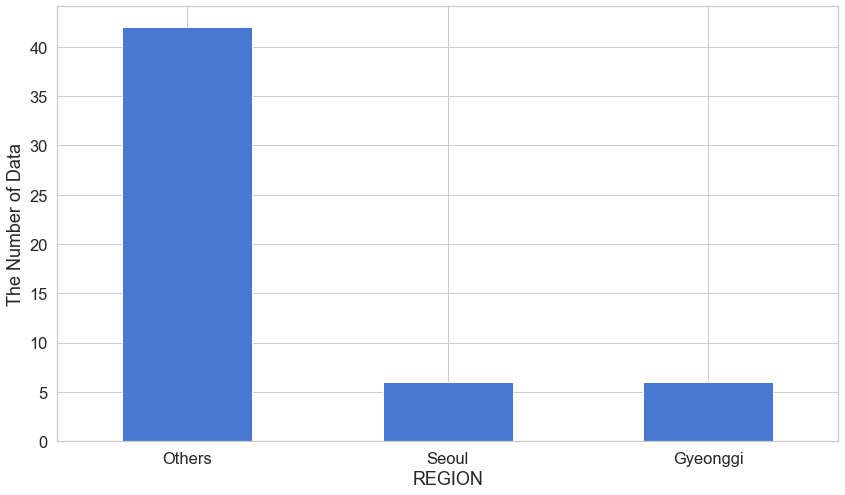

In [8]:
#지역별 데이터 수 비교

LABELS = ["Others", "Seoul", "Gyeonggi"]

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(3), LABELS)
plt.xlabel("REGION")
plt.ylabel("The Number of Data")

In [9]:
data = df

In [10]:
#정상 가격 데이터의 0.7를 학습데이터로 사용하고, 나머지 데이터를 테스트 데이터로 사용
X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(30, 43)

In [11]:
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [12]:
nb_epoch = 500 #학습 횟수
batch_size = 32 #학습 단위
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.1262 - accuracy: 0.0000e+00 - val_loss: 0.1903 - val_accuracy: 0.0588
Epoch 2/500
1/1 [==============================] - 0s 90ms/step - loss: 0.1238 - accuracy: 0.0000e+00 - val_loss: 0.1870 - val_accuracy: 0.0588
Epoch 3/500
1/1 [==============================] - 0s 102ms/step - loss: 0.1212 - accuracy: 0.0000e+00 - val_loss: 0.1837 - val_accuracy: 0.0588
Epoch 4/500
1/1 [==============================] - 0s 110ms/step - loss: 0.1186 - accuracy: 0.0000e+00 - val_loss: 0.1804 - val_accuracy: 0.0588
Epoch 5/500
1/1 [==============================] - 0s 91ms/step - loss: 0.1161 - accuracy: 0.0000e+00 - val_loss: 0.1772 - val_accuracy: 0.0588
Epoch 6/500
1/1 [==============================] - 0s 99ms/step - loss: 0.1135 - accuracy: 0.0000e+00 - val_loss: 0.1741 - val_accuracy: 0.0588
Epoch 7/500
1/1 [==============================] - 0s 83ms/step - loss: 0.1109 - accuracy: 0.0000e+00 - val_loss: 0.1712 - val_accuracy:

1/1 [==============================] - 0s 83ms/step - loss: 0.0370 - accuracy: 0.3000 - val_loss: 0.1146 - val_accuracy: 0.1176
Epoch 59/500
1/1 [==============================] - 0s 78ms/step - loss: 0.0367 - accuracy: 0.3000 - val_loss: 0.1144 - val_accuracy: 0.1176
Epoch 60/500
1/1 [==============================] - 0s 91ms/step - loss: 0.0364 - accuracy: 0.3000 - val_loss: 0.1143 - val_accuracy: 0.1176
Epoch 61/500
1/1 [==============================] - 0s 92ms/step - loss: 0.0361 - accuracy: 0.3000 - val_loss: 0.1142 - val_accuracy: 0.1176
Epoch 62/500
1/1 [==============================] - 0s 101ms/step - loss: 0.0359 - accuracy: 0.2667 - val_loss: 0.1141 - val_accuracy: 0.1176
Epoch 63/500
1/1 [==============================] - 0s 95ms/step - loss: 0.0356 - accuracy: 0.2667 - val_loss: 0.1140 - val_accuracy: 0.1176
Epoch 64/500
1/1 [==============================] - 0s 99ms/step - loss: 0.0354 - accuracy: 0.2667 - val_loss: 0.1138 - val_accuracy: 0.1176
Epoch 65/500
1/1 [=======

Epoch 116/500
1/1 [==============================] - 0s 95ms/step - loss: 0.0251 - accuracy: 0.3000 - val_loss: 0.0972 - val_accuracy: 0.2353
Epoch 117/500
1/1 [==============================] - 0s 96ms/step - loss: 0.0250 - accuracy: 0.3000 - val_loss: 0.0971 - val_accuracy: 0.2353
Epoch 118/500
1/1 [==============================] - 0s 111ms/step - loss: 0.0249 - accuracy: 0.3000 - val_loss: 0.0970 - val_accuracy: 0.2353
Epoch 119/500
1/1 [==============================] - 0s 93ms/step - loss: 0.0248 - accuracy: 0.3000 - val_loss: 0.0969 - val_accuracy: 0.2353
Epoch 120/500
1/1 [==============================] - 0s 77ms/step - loss: 0.0247 - accuracy: 0.3000 - val_loss: 0.0968 - val_accuracy: 0.2353
Epoch 121/500
1/1 [==============================] - 0s 71ms/step - loss: 0.0246 - accuracy: 0.3000 - val_loss: 0.0966 - val_accuracy: 0.2353
Epoch 122/500
1/1 [==============================] - 0s 82ms/step - loss: 0.0245 - accuracy: 0.3000 - val_loss: 0.0965 - val_accuracy: 0.2353
Epoch

Epoch 174/500
1/1 [==============================] - 0s 95ms/step - loss: 0.0210 - accuracy: 0.4000 - val_loss: 0.0940 - val_accuracy: 0.2353
Epoch 175/500
1/1 [==============================] - 0s 90ms/step - loss: 0.0209 - accuracy: 0.4000 - val_loss: 0.0940 - val_accuracy: 0.2353
Epoch 176/500
1/1 [==============================] - 0s 95ms/step - loss: 0.0209 - accuracy: 0.4000 - val_loss: 0.0939 - val_accuracy: 0.2353
Epoch 177/500
1/1 [==============================] - 0s 89ms/step - loss: 0.0208 - accuracy: 0.4000 - val_loss: 0.0939 - val_accuracy: 0.2353
Epoch 178/500
1/1 [==============================] - 0s 99ms/step - loss: 0.0208 - accuracy: 0.4000 - val_loss: 0.0938 - val_accuracy: 0.2353
Epoch 179/500
1/1 [==============================] - 0s 102ms/step - loss: 0.0207 - accuracy: 0.4000 - val_loss: 0.0938 - val_accuracy: 0.2353
Epoch 180/500
1/1 [==============================] - 0s 83ms/step - loss: 0.0207 - accuracy: 0.4000 - val_loss: 0.0937 - val_accuracy: 0.2353
Epoch

1/1 [==============================] - 0s 86ms/step - loss: 0.0188 - accuracy: 0.4667 - val_loss: 0.0917 - val_accuracy: 0.3529
Epoch 232/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0187 - accuracy: 0.4667 - val_loss: 0.0916 - val_accuracy: 0.3529
Epoch 233/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0187 - accuracy: 0.4667 - val_loss: 0.0916 - val_accuracy: 0.3529
Epoch 234/500
1/1 [==============================] - 0s 95ms/step - loss: 0.0187 - accuracy: 0.4667 - val_loss: 0.0916 - val_accuracy: 0.3529
Epoch 235/500
1/1 [==============================] - 0s 92ms/step - loss: 0.0187 - accuracy: 0.4667 - val_loss: 0.0915 - val_accuracy: 0.3529
Epoch 236/500
1/1 [==============================] - 0s 93ms/step - loss: 0.0186 - accuracy: 0.4667 - val_loss: 0.0915 - val_accuracy: 0.3529
Epoch 237/500
1/1 [==============================] - 0s 100ms/step - loss: 0.0186 - accuracy: 0.4667 - val_loss: 0.0915 - val_accuracy: 0.3529
Epoch 238/500
1/1 [

Epoch 289/500
1/1 [==============================] - 0s 95ms/step - loss: 0.0169 - accuracy: 0.4667 - val_loss: 0.0892 - val_accuracy: 0.3529
Epoch 290/500
1/1 [==============================] - 0s 99ms/step - loss: 0.0169 - accuracy: 0.4667 - val_loss: 0.0892 - val_accuracy: 0.3529
Epoch 291/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0169 - accuracy: 0.4667 - val_loss: 0.0891 - val_accuracy: 0.3529
Epoch 292/500
1/1 [==============================] - 0s 88ms/step - loss: 0.0168 - accuracy: 0.4667 - val_loss: 0.0891 - val_accuracy: 0.3529
Epoch 293/500
1/1 [==============================] - 0s 88ms/step - loss: 0.0168 - accuracy: 0.4667 - val_loss: 0.0890 - val_accuracy: 0.3529
Epoch 294/500
1/1 [==============================] - 0s 95ms/step - loss: 0.0168 - accuracy: 0.4667 - val_loss: 0.0890 - val_accuracy: 0.3529
Epoch 295/500
1/1 [==============================] - 0s 81ms/step - loss: 0.0168 - accuracy: 0.4667 - val_loss: 0.0889 - val_accuracy: 0.3529
Epoch 

1/1 [==============================] - 0s 107ms/step - loss: 0.0154 - accuracy: 0.4667 - val_loss: 0.0869 - val_accuracy: 0.3529
Epoch 347/500
1/1 [==============================] - 0s 100ms/step - loss: 0.0154 - accuracy: 0.4667 - val_loss: 0.0868 - val_accuracy: 0.3529
Epoch 348/500
1/1 [==============================] - 0s 104ms/step - loss: 0.0154 - accuracy: 0.4667 - val_loss: 0.0868 - val_accuracy: 0.3529
Epoch 349/500
1/1 [==============================] - 0s 103ms/step - loss: 0.0153 - accuracy: 0.4667 - val_loss: 0.0867 - val_accuracy: 0.3529
Epoch 350/500
1/1 [==============================] - 0s 104ms/step - loss: 0.0153 - accuracy: 0.4667 - val_loss: 0.0867 - val_accuracy: 0.3529
Epoch 351/500
1/1 [==============================] - 0s 107ms/step - loss: 0.0153 - accuracy: 0.4667 - val_loss: 0.0866 - val_accuracy: 0.3529
Epoch 352/500
1/1 [==============================] - 0s 107ms/step - loss: 0.0153 - accuracy: 0.4667 - val_loss: 0.0866 - val_accuracy: 0.3529
Epoch 353/500

1/1 [==============================] - 0s 87ms/step - loss: 0.0142 - accuracy: 0.4667 - val_loss: 0.0845 - val_accuracy: 0.3529
Epoch 404/500
1/1 [==============================] - 0s 91ms/step - loss: 0.0142 - accuracy: 0.4667 - val_loss: 0.0845 - val_accuracy: 0.3529
Epoch 405/500
1/1 [==============================] - 0s 98ms/step - loss: 0.0142 - accuracy: 0.4667 - val_loss: 0.0844 - val_accuracy: 0.3529
Epoch 406/500
1/1 [==============================] - 0s 94ms/step - loss: 0.0142 - accuracy: 0.4667 - val_loss: 0.0844 - val_accuracy: 0.3529
Epoch 407/500
1/1 [==============================] - 0s 99ms/step - loss: 0.0141 - accuracy: 0.4667 - val_loss: 0.0844 - val_accuracy: 0.3529
Epoch 408/500
1/1 [==============================] - 0s 92ms/step - loss: 0.0141 - accuracy: 0.4667 - val_loss: 0.0843 - val_accuracy: 0.3529
Epoch 409/500
1/1 [==============================] - 0s 91ms/step - loss: 0.0141 - accuracy: 0.4667 - val_loss: 0.0843 - val_accuracy: 0.3529
Epoch 410/500
1/1 [=

Epoch 461/500
1/1 [==============================] - 0s 95ms/step - loss: 0.0131 - accuracy: 0.4667 - val_loss: 0.0828 - val_accuracy: 0.4118
Epoch 462/500
1/1 [==============================] - 0s 81ms/step - loss: 0.0131 - accuracy: 0.4667 - val_loss: 0.0828 - val_accuracy: 0.4118
Epoch 463/500
1/1 [==============================] - 0s 105ms/step - loss: 0.0131 - accuracy: 0.4667 - val_loss: 0.0827 - val_accuracy: 0.4118
Epoch 464/500
1/1 [==============================] - 0s 108ms/step - loss: 0.0131 - accuracy: 0.4667 - val_loss: 0.0827 - val_accuracy: 0.4118
Epoch 465/500
1/1 [==============================] - 0s 86ms/step - loss: 0.0130 - accuracy: 0.4667 - val_loss: 0.0826 - val_accuracy: 0.4118
Epoch 466/500
1/1 [==============================] - 0s 86ms/step - loss: 0.0130 - accuracy: 0.4667 - val_loss: 0.0826 - val_accuracy: 0.4118
Epoch 467/500
1/1 [==============================] - 0s 95ms/step - loss: 0.0130 - accuracy: 0.4667 - val_loss: 0.0826 - val_accuracy: 0.4118
Epoc

In [13]:
autoencoder = load_model('model.h5')

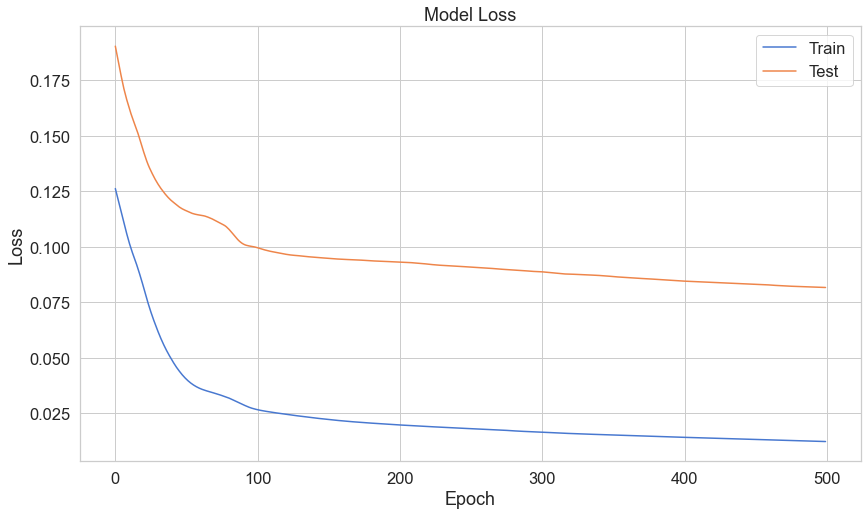

In [14]:
#epoch당 재구성 오류의 수렴 확인
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right');

In [15]:
# 데이터의 평균치 및 분산 비교
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,17.000000,17.000000
mean,0.080823,0.205882
std,0.104965,0.356144
min,0.006994,0.000000
25%,0.012454,0.000000
50%,0.022121,0.000000
75%,0.177756,0.500000
max,0.311846,1.000000


In [16]:
#전체 테스트 데이터 각각의 재구성 오류
error_df

,reconstruction_error,true_class
19,0.009191,0.0
49,0.012454,0.0
48,0.009332,0.0
12,0.042436,0.0
44,0.007083,0.0
5,0.202181,0.5
17,0.027186,0.0
52,0.022121,0.0
3,0.177756,0.5
32,0.015435,0.0


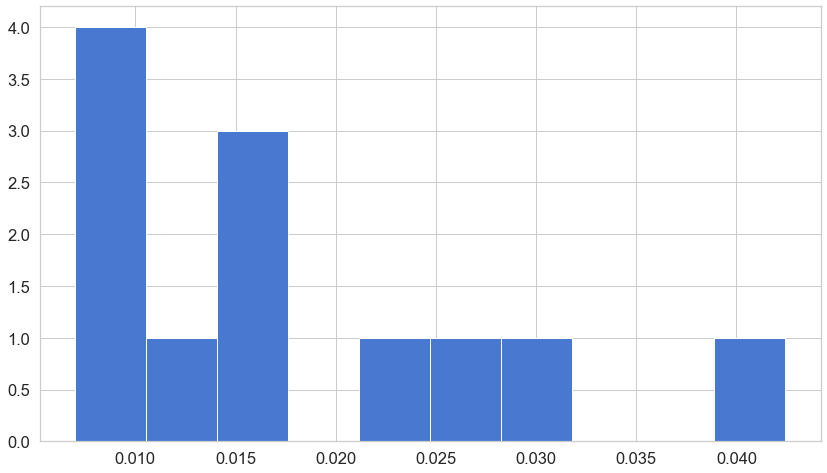

In [17]:
#정상 가격 데이터의 재구성 오류 분포 확인
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [18]:
# 정상 가격 데이터(클래스 = 0) 각각의 재구성 오류
normal_error_df

,reconstruction_error,true_class
19,0.009191,0.0
49,0.012454,0.0
48,0.009332,0.0
12,0.042436,0.0
44,0.007083,0.0
17,0.027186,0.0
52,0.022121,0.0
32,0.015435,0.0
13,0.031507,0.0
26,0.006994,0.0


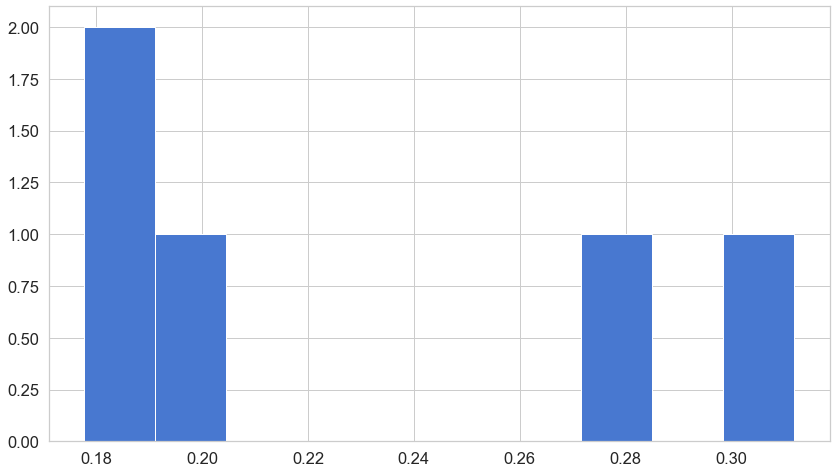

In [19]:
#나머지 지역의 재구성 오류 분포 확인
fig = plt.figure()
ax = fig.add_subplot(111)
bubble_error_df = error_df[error_df['true_class'] > 0]
_ = ax.hist(bubble_error_df.reconstruction_error.values, bins=10)

In [20]:
# 버블 의심 가격 데이터(클래스 =/= 0) 각각의 재구성 오류
bubble_error_df

,reconstruction_error,true_class
5,0.202181,0.5
3,0.177756,0.5
8,0.276494,1.0
6,0.311846,1.0
4,0.189610,0.5


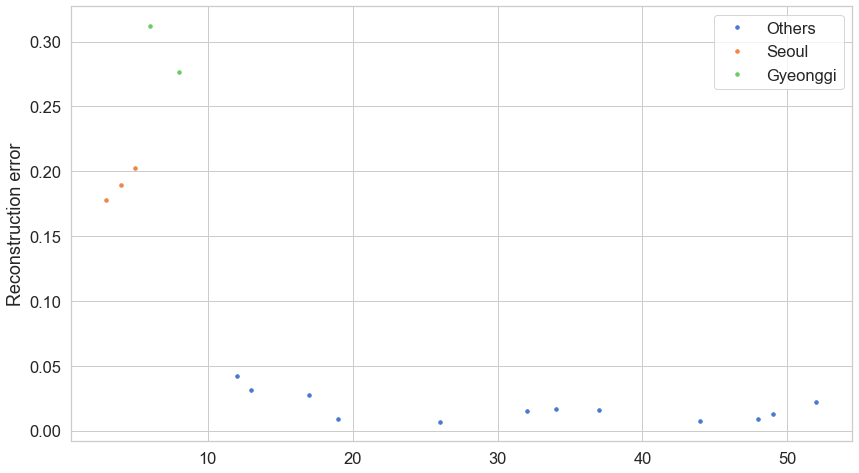

In [21]:
#지역별 재구성 오류 산포도
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= name)
ax.legend(["Others", "Seoul", "Gyeonggi"])
plt.ylabel("Reconstruction error")
plt.show();